In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob


In [7]:

# Download NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:

# Load TED Talks data
df = pd.read_csv('JOINT_ted_video_transcripts_comments_stats.csv')


In [10]:
df.head()

,video_id,transcript,polarity_neg_transcript,polarity_pos_transcript,polarity_neu_transcript,polarity_compound_transcript,tags,title,publushed_date,comments_count,...,trust,fear,negative,sadness,anger,surprise,positive,disgust,joy,anticipation
0,YgAuFqEs6yk,remember watch father raise pistol plead gu...,0.133,0.330,0.537,0.9996,"['Family', 'Parenting', 'Communication', 'Chil...","How to co-parent as allies, not adversaries | ...",2020-05-14 14:40:00,109.0,...,0.007296,0.003192,0.003648,0.002736,0.001824,0.004560,0.019608,0.001368,0.010032,0.008664
1,bNmRr-BYnxA,think give half humanity ' spend week...,0.194,0.267,0.539,0.9980,"['climate change', 'environment', 'global issu...",How to shift your mindset and choose your futu...,2020-05-13 14:22:51,205.0,...,0.008208,0.004560,0.006840,0.002280,0.003648,0.002280,0.021888,0.002280,0.004560,0.008664
2,FVUkKKc3Vvk,work trading floor ' m pretty new graduate ...,0.111,0.306,0.583,0.9993,"['Life', 'Society', 'Immigration', 'Humanity',...",What's missing from the American immigrant nar...,2020-05-12 18:06:31,234.0,...,0.003648,0.001368,0.001824,0.001824,0.000912,0.001824,0.005928,0.000000,0.002280,0.005016
3,8bj0GR34XWc,worry pandemic pretty life play absolut...,0.135,0.166,0.699,0.9492,"['global issues', 'science', 'collaboration', ...",A global pandemic calls for global solutions |...,2020-05-11 15:52:37,236.0,...,0.004104,0.002736,0.004560,0.002736,0.002736,0.001824,0.006840,0.002280,0.002736,0.002280
4,eaCrsBtiYA4,public policy wonk investigate datum point ...,0.200,0.164,0.636,-0.9904,[],Racism has a cost for everyone | Heather C. Mc...,2020-05-08 18:44:35,542.0,...,0.004104,0.000912,0.001824,0.001368,0.000912,0.002280,0.008208,0.000456,0.003192,0.003192


In [11]:
df.tail()

,video_id,transcript,polarity_neg_transcript,polarity_pos_transcript,polarity_neu_transcript,polarity_compound_transcript,tags,title,publushed_date,comments_count,...,trust,fear,negative,sadness,anger,surprise,positive,disgust,joy,anticipation
2413,HUM2rCIUdeI,interest contemporary form slavery start le...,0.275,0.175,0.550,-0.9995,"['Kevin', 'Bales', 'talks', 'slavery', 'human'...",Kevin Bales: How to combat modern slavery,2010-03-29 14:59:48,258.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2414,C_SBGTJgBGo,Los Angeles Times columnist walk street dow...,0.144,0.256,0.600,0.9909,"['Robert', 'Gupta', 'talks', 'Fellow', 'music'...","Robert Gupta: Music is medicine, music is sanity",2010-03-26 16:07:14,128.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2415,MLU7qcMYKO8,billion year history minute million year mi...,0.024,0.111,0.865,0.9970,"['Joel', 'Levine', 'talks', 'TEDxNASA', 'NASA'...",Joel Levine: Why we need to go back to Mars,2010-03-25 14:29:50,285.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2416,yyemG7V5ynQ,basically public leader public official con...,0.038,0.190,0.772,0.9900,"['Alan', 'Siegel', 'talks', 'law', 'fine', 'pr...",Alan Siegel: Let's simplify legal jargon!,2010-03-24 15:03:44,84.0,...,0.011856,0.005472,0.00912,0.00228,0.002736,0.001368,0.020064,0.001824,0.00456,0.002736
2417,zDcaoTVy4fA,illegal wildlife trade Brazil major threat ...,0.107,0.179,0.713,0.9486,"['Juliana', 'Machado', 'Ferreira', 'talks', 'F...",Juliana Machado Ferreira: The fight to end rar...,2010-03-23 18:10:41,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.isnull().sum()

video_id                          0
transcript                        0
polarity_neg_transcript           0
polarity_pos_transcript           0
polarity_neu_transcript           0
polarity_compound_transcript      0
tags                             10
title                            10
publushed_date                   10
comments_count                   24
dislike_count                    10
like_count                       10
views_count                      10
today                            10
days_age                         10
views_per_day                    10
dislike_perc_of_likes            10
success                          10
prime_tag                        10
comments                        440
polarity_neg_comments           440
polarity_pos_comments           440
polarity_neu_comments           440
polarity_compound_comments      440
trust                           440
fear                            440
negative                        440
sadness                     

In [14]:


# Remove rows with null values
df = df.dropna()

# Verify if null values have been removed
null_values_after_removal = df.isnull().sum()
print("\nNull values after removal:\n", null_values_after_removal)



Null values after removal:
 video_id                        0
transcript                      0
polarity_neg_transcript         0
polarity_pos_transcript         0
polarity_neu_transcript         0
polarity_compound_transcript    0
tags                            0
title                           0
publushed_date                  0
comments_count                  0
dislike_count                   0
like_count                      0
views_count                     0
today                           0
days_age                        0
views_per_day                   0
dislike_perc_of_likes           0
success                         0
prime_tag                       0
comments                        0
polarity_neg_comments           0
polarity_pos_comments           0
polarity_neu_comments           0
polarity_compound_comments      0
trust                           0
fear                            0
negative                        0
sadness                         0
anger              

In [15]:

# Function to preprocess text
def preprocess_text(text):
    if pd.isnull(text):
        return ''
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    text = ' '.join([word for word in tokens if word not in stop_words])
    return text


In [16]:
# Combine title and transcript, then preprocess
df['details'] = df['title'] + ' ' + df['transcript']
df['details'] = df['details'].apply(preprocess_text)


In [19]:
# Splitting the datetime string by space
splitted = df['publushed_date'].str.split(' ', expand=True)

# Creating columns for date, month, year, hour, minute, and second of the talk
df['date'] = splitted[0]
df['time'] = splitted[1]

# Extracting date components
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month
df['day'] = pd.to_datetime(df['date']).dt.day

# Extracting time components
df['hour'] = pd.to_datetime(df['time']).dt.hour
df['minute'] = pd.to_datetime(df['time']).dt.minute
df['second'] = pd.to_datetime(df['time']).dt.second

# Dropping the temporary columns 'date' and 'time'
df.drop(['date', 'time'], axis=1, inplace=True)

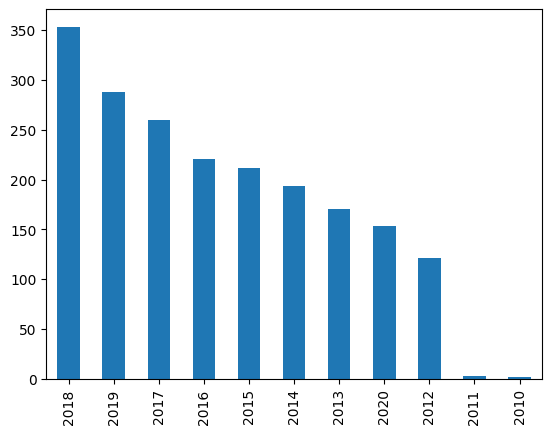

In [20]:
df['year'].value_counts().plot.bar(),
plt.show()

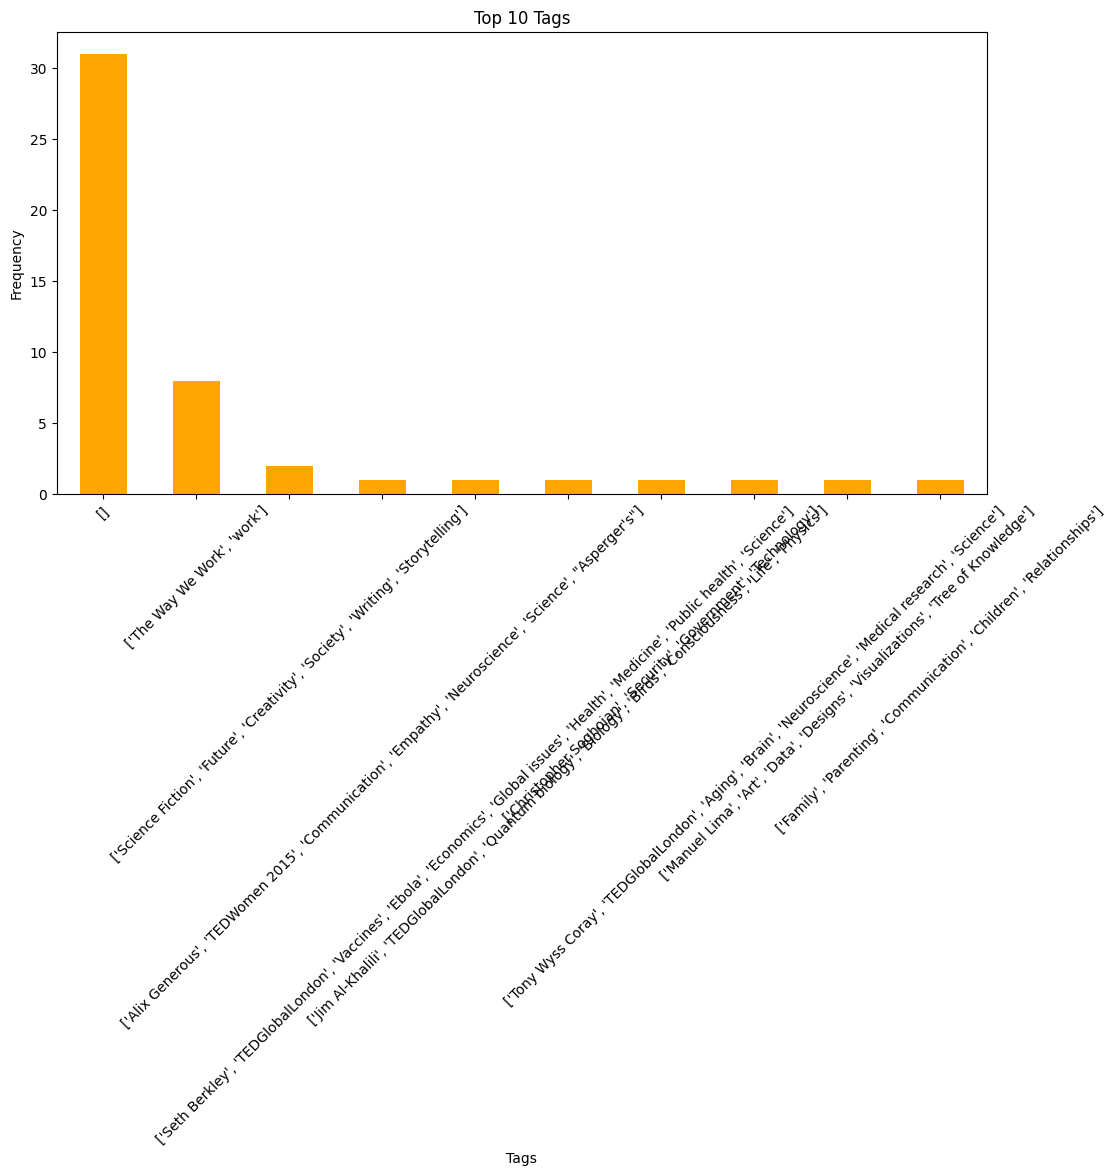

In [17]:
plt.figure(figsize=(12, 6))
top_tags = df['tags'].explode().value_counts().head(10)
top_tags.plot(kind='bar', color='orange')
plt.title('Top 10 Tags')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [21]:

# Function to perform sentiment analysis on comments
def analyze_sentiment(comment):
    analysis = TextBlob(comment)
    return analysis.sentiment.polarity


In [22]:

# Load and preprocess comments
comments = df['comments'].fillna('').astype(str)
comments = comments.apply(preprocess_text)


In [23]:

# Function to calculate similarities between input talk_content and dataset
def get_similarities(talk_content, data=df):
    vectorizer = TfidfVectorizer()
    vectorizer.fit(data['details'])
    talk_array1 = vectorizer.transform(talk_content)
    details_array = vectorizer.transform(data['details'])  # Vectorize all details at once
    sim = cosine_similarity(talk_array1, details_array)
    return sim.flatten()  # Flatten the similarity matrix to a 1D array

In [24]:
import pickle

# Define the function
def recommend_talks_with_sentiment(talk_content, comments, data=df):
    cos_similarities = get_similarities(talk_content)
    comment_sentiments = comments.apply(analyze_sentiment).values

    # Combine cosine similarities and sentiment analysis
    weighted_score = 0.7 * cos_similarities + 0.3 * comment_sentiments
    data['score'] = weighted_score

    # Sort by score and display top recommendations
    recommended_talks = data.sort_values(by='score', ascending=False).head(5)
    return recommended_talks['details']

# Pickle the function
with open('recommend_talks_with_sentiment.pkl', 'wb') as f:
    pickle.dump(recommend_talks_with_sentiment, f)


In [25]:

# Example usage
talk_content = ['how to speak confidentlyy']
recommended_talks = recommend_talks_with_sentiment(talk_content, comments)
print(recommended_talks)


792     get comfortable uncomfortable luvvie ajayi pro...
1099    4 reasons learn new language john mcwhorter sp...
81      dictators hate political cartoons keep drawing...
1069    speak adam galinsky speak hard understand true...
1592    speak people want listen julian treasure human...
Name: details, dtype: object
